Name: Emin Eren Sarı

ID: 191104087

Course: BIL470

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from dt import DecisionTreeClassifier
from kmeans import KMeansClusterClassifier

# Exploratory Data Analysis (EDA)

### Read Dataset

In [102]:

# Iris veri setini yükle
iris = pd.read_csv("Iris.csv")

# "Id" sütununu düş
iris = iris.drop(columns=["Id"])

# Species sütununu integer etiketlere dönüştür
species_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
iris["Species"] = iris["Species"].map(species_mapping)

# SepalWidth hariç tüm özellikleri seç
X = iris.drop(columns=["SepalWidthCm", "Species"]).values.tolist()
y = iris["Species"].values.tolist()



# X'i DataFrame'e dönüştür ve özellik isimlerini ayarla
X_df = pd.DataFrame(X, columns=["SepalLengthCm", "PetalLengthCm", "PetalWidthCm"])

Improve dataset:
Remove id column 
Change Class labels that are given in the last column to  integer values (0, 1, 2);


### Dataset Summary

In [103]:
# 1. Dataset Özeti
print("Dataset Summary:")
print(iris.head())
print("\nInfo:")
print(iris.info())
print("\nDescription:")
print(iris.describe())

Dataset Summary:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Description:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count

General image of dataset

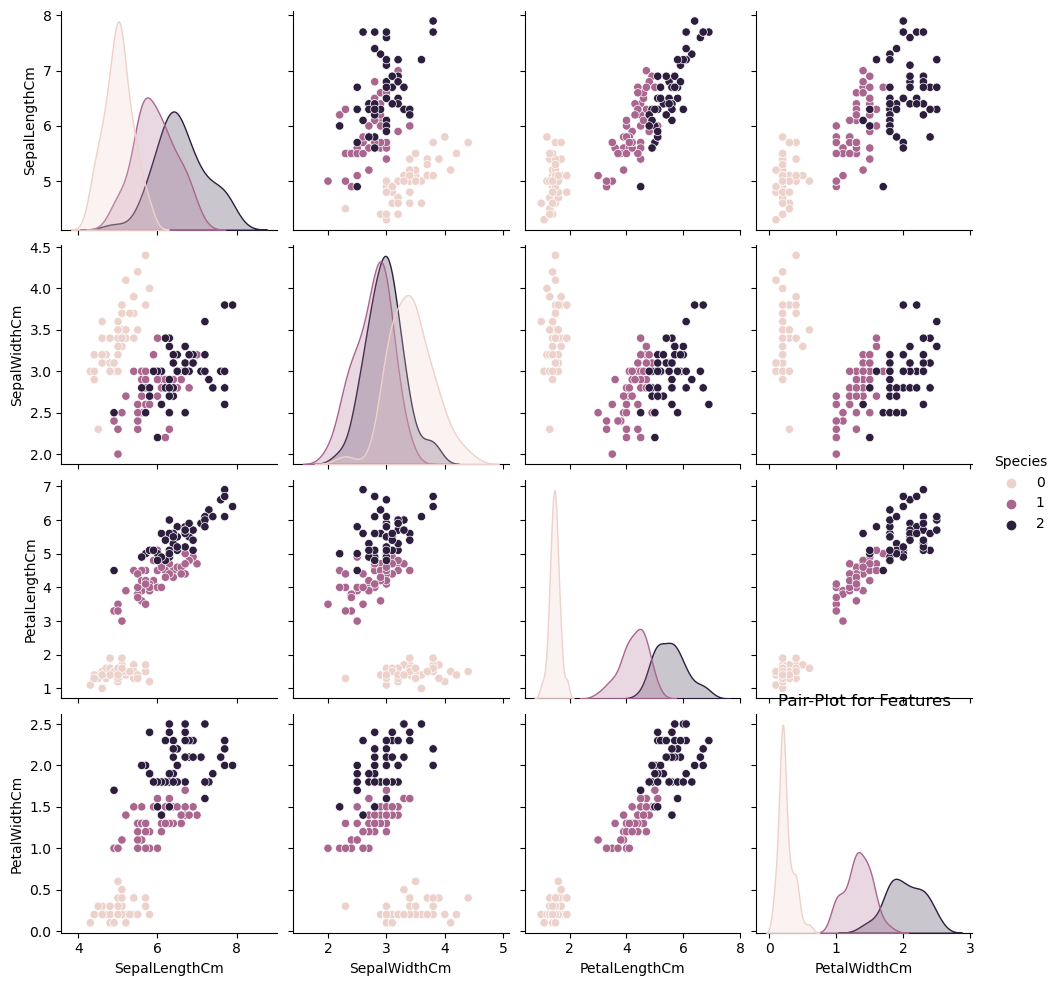

In [104]:
# 2. Dataset'in Genel Görünümü
sns.pairplot(iris, hue="Species")
plt.title("Pair-Plot for Features")
plt.show()

Duplicat data in the dataset

In [105]:
# 3. Çift Kayıtların Kontrolü
duplicate_count = iris.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 3


Checking balance of dataset

In [106]:
# 4. Dataset Dengesinin Kontrolü
class_counts = iris["Species"].value_counts()
print("\nClass Balance:")
print(class_counts)



Class Balance:
Species
0    50
1    50
2    50
Name: count, dtype: int64


### Pair-plots for features

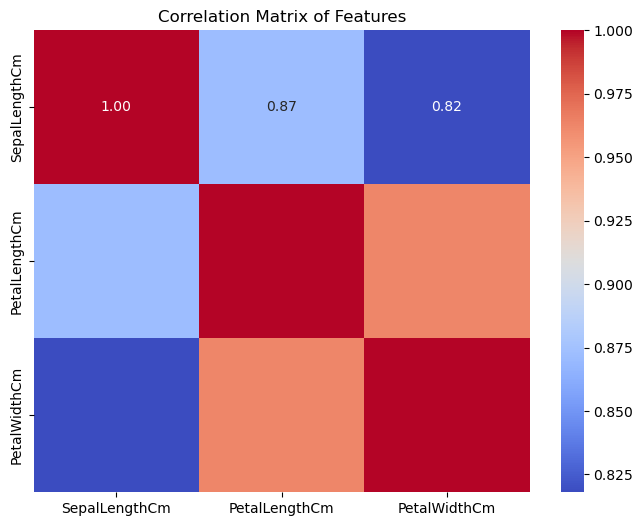

In [107]:
# 5. Korelasyon Matrisi
correlation_matrix = X_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

### Correlation Matrix of Features - Correlation Matrix of Features and Target

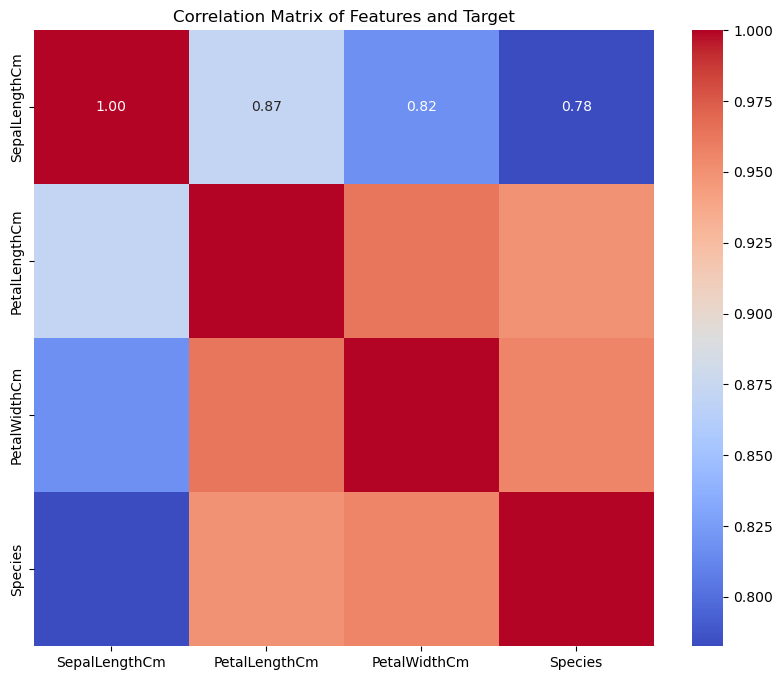

In [108]:

# Özellikler ve hedef değişkeni içeren bir DataFrame oluştur
data_with_target = X_df.copy()
data_with_target["Species"] = y
# 3. Korelasyon Matrisi (Özellikler ve Hedef)
correlation_matrix_with_target = data_with_target.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features and Target")
plt.show()

# Train Decision Tree classifier

In [109]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [110]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

## Train The Decision Tree Classifier

In [111]:
clf.fit(X_train_list,y_train_list);

## Predict Class of Test values

In [112]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);


Test Features Expected Classification
[2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2]
Prediction
[2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2]


# Train K Means Cluster Classifier

In [113]:
# Iris veri setini yükle
iris = pd.read_csv("Iris.csv")

# "Id" sütununu düş
iris = iris.drop(columns=["Id"])

# Species sütununu integer etiketlere dönüştür
species_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
iris["Species"] = iris["Species"].map(species_mapping)

# SepalWidth hariç tüm özellikleri seç
X = iris.drop(columns=["SepalWidthCm", "Species"]).values.tolist()
y = iris["Species"].values.tolist()

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)



Creat elbow method to dertermine ideal number of clusters

## Elbow Method

In [114]:
from typing import List

def elbow_method(X: List[List[float]], max_clusters: int):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeansClusterClassifier(n_cluster=k)
        kmeans.fit(X, [0] * len(X))  #
        clusters = kmeans.assign_clusters(X)
        
        
        total_sse = 0
        for i, cluster in enumerate(clusters):
            centroid = kmeans.centroids[i]
            total_sse += sum(kmeans.euclidean_distance(point, centroid) ** 2 for point in cluster)
        sse.append(total_sse)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()


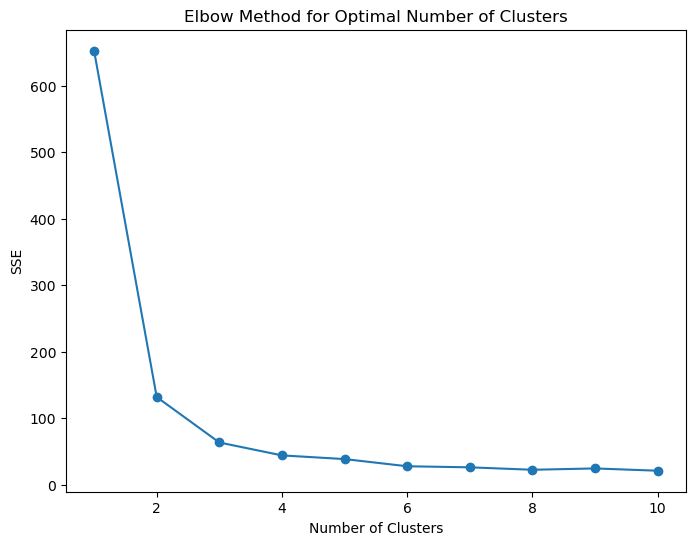

In [115]:
elbow_method(X, max_clusters=10)

Cluster 2 olunca ciddi bir SSE azalması söz konusu 3'e geçince de yine oldukça iyi bir kırım söz konusu. 4'ten sonra çok bir değişim yok. Bizim problemimizde 3 adet Iris tipi olduğu için 3 kullanmak çok daha mantıklı.

The plot shows that the ideal number of cluster should be between 2 and 4.
In that case we assume it 3

## Train The K Means Cluster Classifier

In [116]:
clf2=KMeansClusterClassifier(n_cluster=3)
clf2.fit(X_train,y_train);

## Plot of 3D Cluster


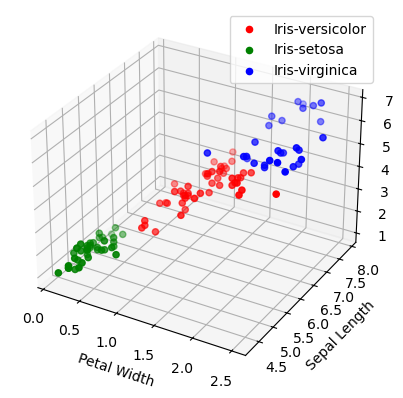

In [117]:
# Eğitim setindeki verileri kümelere atayın
clusters = clf2.assign_clusters(X_train)

# Kümeleri iris türlerine eşle
species_inverse_mapping = {v: k for k, v in species_mapping.items()}
cluster_labels = [species_inverse_mapping[label] for label in clf2.labels]


# 3D grafiği çiz
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    cluster = list(zip(*cluster))
    ax.scatter(cluster[2], cluster[0], cluster[1], c=colors[i], label=cluster_labels[i])

ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()


Ufak tefek hatalar dışında grafikte de görüleceği üzere oldukça iyi ayrılmış veriler. Bu veriseti seçtiğimiz 3 öznitelik ile Kmeans için oldukça uygun 

## Predict Class of Test values

In [118]:
yhat_km = clf2.predict(X_test)
print("Test Features Expected Classification")
print(y_test)
print("Prediction")
print(yhat_km);

Test Features Expected Classification
[1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2]
Prediction
[1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1]


# Results

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc

# Test seti üzerinde tahminler yap
y_pred_train = clf2.predict(X_train)  # Eğitim seti üzerindeki tahminler
y_pred_test = clf2.predict(X_test)    # Test seti üzerindeki tahminler

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_mapping.keys(), yticklabels=species_mapping.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


def evaluate_metrics(y_true, y_pred, title):
    return y_true, y_pred



def evaluate_f1(y_true, y_pred, title):
    print(f"\n{title}")
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    
    print(f'F1 Score: {f1:.2f}')
    
    
    return y_true, y_pred

def evaluate_accuracy(y_true, y_pred, title):
    print(f"\n{title}")
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    
    return y_true, y_pred

def evaluate_precision(y_true, y_pred, title):
    print(f"\n{title}")
    precision = precision_score(y_true, y_pred, average='weighted')
    
    
    print(f'Precision: {precision:.2f}')    
    return y_true, y_pred

def evaluate_recall(y_true, y_pred, title):
    print(f"\n{title}")

    recall = recall_score(y_true, y_pred, average='weighted')

    print(f'Recall: {recall:.2f}')
    
    return y_true, y_pred



def plot_roc_curve(y_true, y_pred, title):
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve([1 if x == i else 0 for x in y_true], [1 if x == i else 0 for x in y_pred])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure()
    for i, color in zip(range(3), ['r', 'g', 'b']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()



In [120]:
# Tahminler
y_train_pred = clf.predict(X_train_list)
y_test_pred = clf.predict(X_test_list)


### Confusion Matrix of Decision TreeTest

In [121]:
# Performans Metrikleri
def print_metrics(y_true, y_pred, label):
    print(f'{label} için Performans Metrikleri:')
    print(f'Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}')

print_metrics(y_train_list, y_train_pred, 'Decision Tree Eğitim')
print_metrics(y_test_list, y_test_pred, 'Decision Tree Test')

Decision Tree Eğitim için Performans Metrikleri:
Confusion Matrix:
[[43  0  0]
 [ 0 41  0]
 [ 0  0 36]]
Decision Tree Test için Performans Metrikleri:
Confusion Matrix:
[[ 7  0  0]
 [ 0  9  0]
 [ 0  1 13]]


### Confusion Matrix of K Means Cluster Test

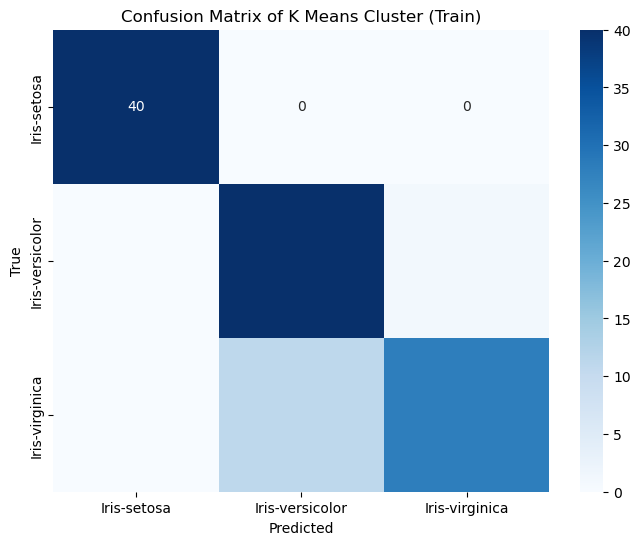

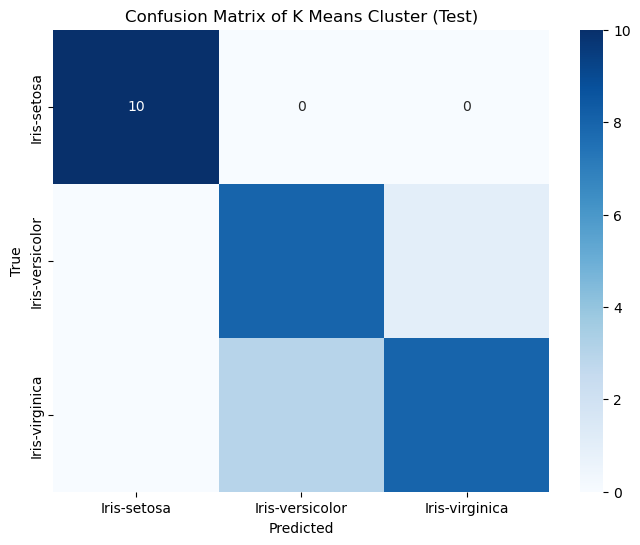

In [122]:
# Eğitim seti için metrikler ve ROC
cm_train = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm_train, "Confusion Matrix of K Means Cluster (Train)")

# Test seti için metrikler ve ROC
cm_test = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_test, "Confusion Matrix of K Means Cluster (Test)")

### F1-Score of Decision Tree Classifier and K Means Cluster Classifier

In [123]:
# Performans Metrikleri
def print_metrics(y_true, y_pred, label):
    print(f'{label} için Performans Metrikleri:')
    print(f'F1-Score: {f1_score(y_true, y_pred, average="macro"):.2f}')

print_metrics(y_train_list, y_train_pred, 'Decision Tree Eğitim')
print_metrics(y_test_list, y_test_pred, 'Decision Tree Test')

Decision Tree Eğitim için Performans Metrikleri:
F1-Score: 1.00
Decision Tree Test için Performans Metrikleri:
F1-Score: 0.97


In [124]:
# Eğitim seti için metrikler ve ROC
y_train, y_pred_train = evaluate_f1(y_train, y_pred_train, "K Means Cluster (Train) Metrics")


# Test seti için metrikler ve ROC
y_test, y_pred_test = evaluate_f1(y_test, y_pred_test, "K Means Cluster (Test) Metrics")



K Means Cluster (Train) Metrics
F1 Score: 0.90

K Means Cluster (Test) Metrics
F1 Score: 0.87


### Accuracy of Decision Tree Classifier and K Means Cluster Classifier

In [125]:
# Performans Metrikleri
def print_metrics(y_true, y_pred, label):
    print(f'{label} için Performans Metrikleri:')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.2f}')

print_metrics(y_train_list, y_train_pred, 'Decision Tree Eğitim')
print_metrics(y_test_list, y_test_pred, 'Decision Tree Test')

Decision Tree Eğitim için Performans Metrikleri:
Accuracy: 1.00
Decision Tree Test için Performans Metrikleri:
Accuracy: 0.97


In [126]:
# Eğitim seti için metrikler ve ROC
y_train, y_pred_train = evaluate_accuracy(y_train, y_pred_train, "K Means Cluster (Train) Metrics")


# Test seti için metrikler ve ROC
y_test, y_pred_test = evaluate_accuracy(y_test, y_pred_test, "K Means Cluster (Test) Metrics")


K Means Cluster (Train) Metrics
Accuracy: 0.90

K Means Cluster (Test) Metrics
Accuracy: 0.87


### Precision of Decision Tree Classifier and K Means Cluster Classifier

In [127]:
# Performans Metrikleri
def print_metrics(y_true, y_pred, label):
    print(f'{label} için Performans Metrikleri:')
    print(f'Precision: {precision_score(y_true, y_pred, average="macro"):.2f}')

print_metrics(y_train_list, y_train_pred, 'Decision Tree Eğitim')
print_metrics(y_test_list, y_test_pred, 'Decision Tree Test')

Decision Tree Eğitim için Performans Metrikleri:
Precision: 1.00
Decision Tree Test için Performans Metrikleri:
Precision: 0.97


In [128]:
# Eğitim seti için metrikler ve ROC
y_train, y_pred_train = evaluate_precision(y_train, y_pred_train, "K Means Cluster (Train) Metrics")


# Test seti için metrikler ve ROC
y_test, y_pred_test = evaluate_precision(y_test, y_pred_test, "K Means Cluster (Test) Metrics")


K Means Cluster (Train) Metrics
Precision: 0.92

K Means Cluster (Test) Metrics
Precision: 0.88


### Recal of Decision Tree Classifier and K Means Cluster Classifier

In [129]:
# Performans Metrikleri
def print_metrics(y_true, y_pred, label):
    print(f'{label} için Performans Metrikleri:')
    print(f'Recall: {recall_score(y_true, y_pred, average="macro"):.2f}')

print_metrics(y_train_list, y_train_pred, 'Decision Tree Eğitim')
print_metrics(y_test_list, y_test_pred, 'Decision Tree Test')

Decision Tree Eğitim için Performans Metrikleri:
Recall: 1.00
Decision Tree Test için Performans Metrikleri:
Recall: 0.98


In [130]:
# Eğitim seti için metrikler ve ROC
y_train, y_pred_train = evaluate_recall(y_train, y_pred_train, "K Means Cluster (Train) Metrics")


# Test seti için metrikler ve ROC
y_test, y_pred_test = evaluate_recall(y_test, y_pred_test, "K Means Cluster (Test) Metrics")


K Means Cluster (Train) Metrics
Recall: 0.90

K Means Cluster (Test) Metrics
Recall: 0.87


### Plot of ROC Curve (Decision Tree/K Means Cluster) and Value of AUC (Decision Tree/K Means Cluster)

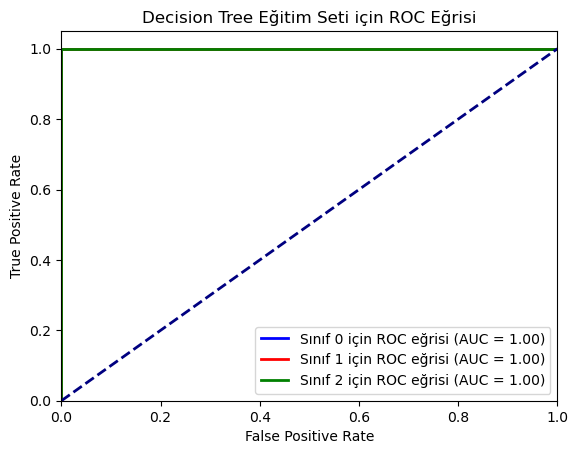

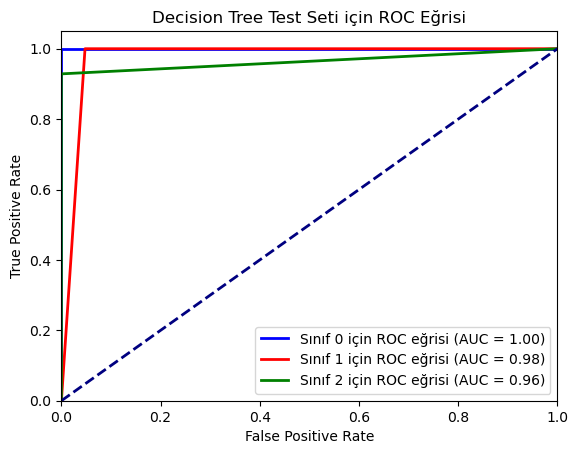

In [131]:
# Eğitim seti üzerinde tahminler
y_train_pred = clf.predict(X_train_list)
y_train_pred_bin = label_binarize(y_train_pred, classes=[0, 1, 2])

# Test seti üzerinde tahminler
y_test_pred = clf.predict(X_test_list)
y_test_pred_bin = label_binarize(y_test_pred, classes=[0, 1, 2])

# Y binarization
y_train_bin = label_binarize(y_train_list, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test_list, classes=[0, 1, 2])

# ROC ve AUC hesaplaması ve çizimi
def plot_roc_curve(y_true_bin, y_pred_bin, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Her sınıf için ROC eğrisi çizimi
    plt.figure()
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Sınıf {i} için ROC eğrisi (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Eğitim seti için ROC eğrisi ve AUC
plot_roc_curve(y_train_bin, y_train_pred_bin, 'Decision Tree Eğitim Seti için ROC Eğrisi')

# Test seti için ROC eğrisi ve AUC
plot_roc_curve(y_test_bin, y_test_pred_bin, 'Decision Tree Test Seti için ROC Eğrisi')

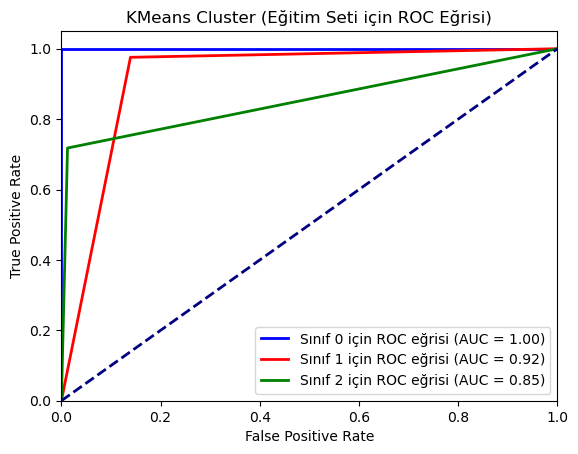

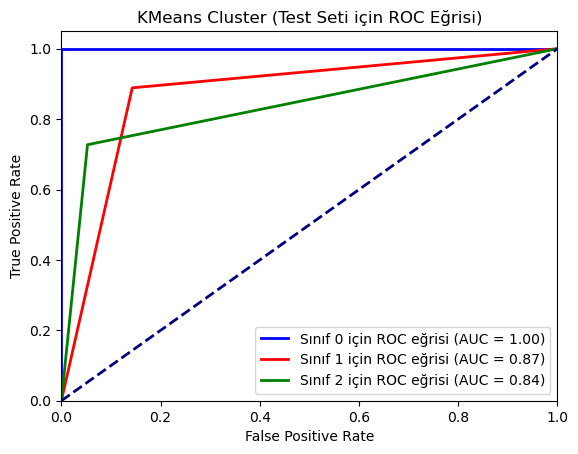

In [132]:
# Y binarization
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# KMeans Cluster Classifier için aynı işlemleri yapmak
# Eğitim seti üzerinde tahminler
y_train_pred_km = clf2.predict(X_train)
y_train_pred_bin_km = label_binarize(y_train_pred_km, classes=[0, 1, 2])

# Test seti üzerinde tahminler
y_test_pred_km = clf2.predict(X_test)
y_test_pred_bin_km = label_binarize(y_test_pred_km, classes=[0, 1, 2])

# Eğitim seti için ROC eğrisi ve AUC
plot_roc_curve(np.array(y_train_bin), np.array(y_train_pred_bin_km), 'KMeans Cluster (Eğitim Seti için ROC Eğrisi)')

# Test seti için ROC eğrisi ve AUC
plot_roc_curve(np.array(y_test_bin), np.array(y_test_pred_bin_km), 'KMeans Cluster (Test Seti için ROC Eğrisi)')



Karar Ağacı Sınıflandırıcı

Karar ağacı sınıflandırıcı hem eğitim hem de test setlerinde yüksek F1 skorları ve doğrulukla oldukça iyi performans göstermiş, ayrıca anlaşılması ve görselleştirilmesi daha kolay, bu da modelin karar verme mantığını anlamak için daha kolay. Karar ağaçları, hangi özniteliklerin  sınıflandırma için en önemli olduğunu anlamada yarar sağlıyor.

 Karar ağaçları, eğitim verilerinde overfitting'e sebep olabilir, benim eğitim setinde mükemmel doğrulukla gösterildiği gibi, ancak görülmemiş verilerde daha kötü genellemeyle sonuçlanabilir. Ancak benim test verilerimde bu durum söz konusu değil. Karar ağaçları genel olarak karmaşık problemler için daha iyi sonuçlar verebilir ancak verideki küçük değişiklikler tamamen farklı bir ağaca neden olabilir ve modelin kararlılığını etkileyebilir.


K-Means Küme Sınıflandırıcı

K-Means uygulaması oldukça basit ve hesaplama yapması daha verimli olmasından dolayı büyük veri setleri için çok uygun. Eğitim için etiketli veri gerektirmediği için, veri analizini anlamak için ve kümelemek için işe yarar. K-Means sınıflandırıcı genellikle karar ağacına göre daha düşük F1 skorları ve doğruluk değerlerine sahiptir ve benim yaptığım testlerde de bu gözüküyor. Bu durum daha karmaşık verisetlerinde çok iyi sonuçlar vermeyeceğini gösteriyor. K-Means'in performansı doğrudan etkileyen şeylerden birisi küme merkezlerinin ilk başta nerede olacağı. Başlangıç konumları random olduğu zaman her test sonucunda farklı doğruluk sonuçları gözüküyor. Benim testlerimde de her çalıştırmam da farklı değerlerle karşılaşılabiliyor.

Etiketli veri gerektirmediği için benzer verileri gruplamak amacıyla kullanılabilir. Veri setinde açık ve iyi ayrılmış kümeler olduğunda çok iyi çalışır.


Eğer bir kararın neden alındığını anlamak istiyorsak ve verilerimiz karmaşık bir yapıdaysa, Karar Ağacı kullanmak daha mantıklı. Ancak, verileri sadece gruplara ayırmak istiyorsak ve kesin bir sonuçtan çok genel bir fikir edinmek istiyorsak, K-Means daha uygun olabilir. Benim test ettiğim bu verisetinde, Karar Ağacı daha doğru sonuçlar verdi.